In [ ]:
#########RENEWABLE ENERGY GENERATION#############

Index(['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'TIME',
       'Value', 'Flag Codes', 'Region'],
      dtype='object')
Index(['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'TIME',
       'Value', 'Flag Codes', 'Region'],
      dtype='object')


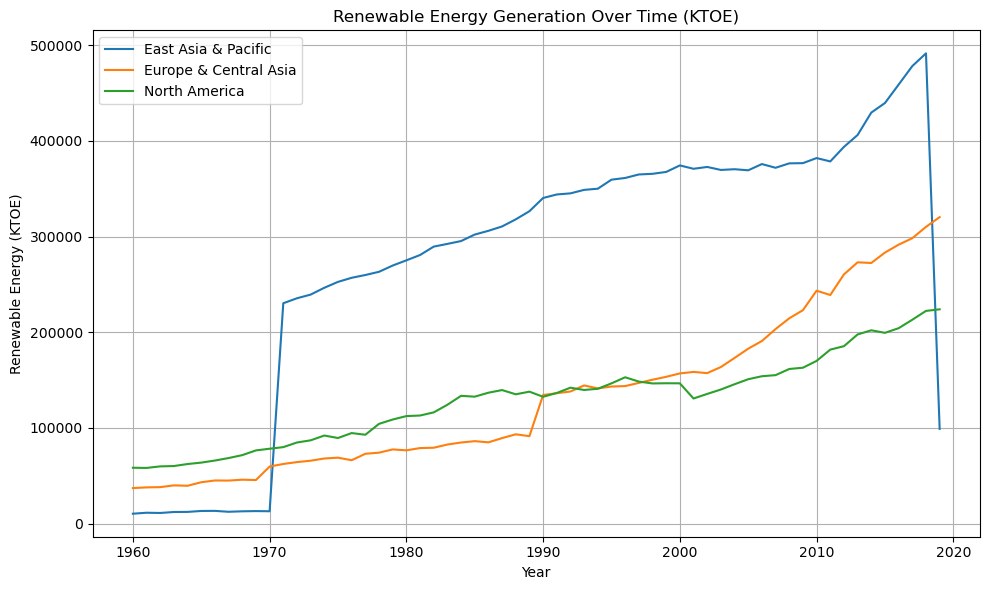

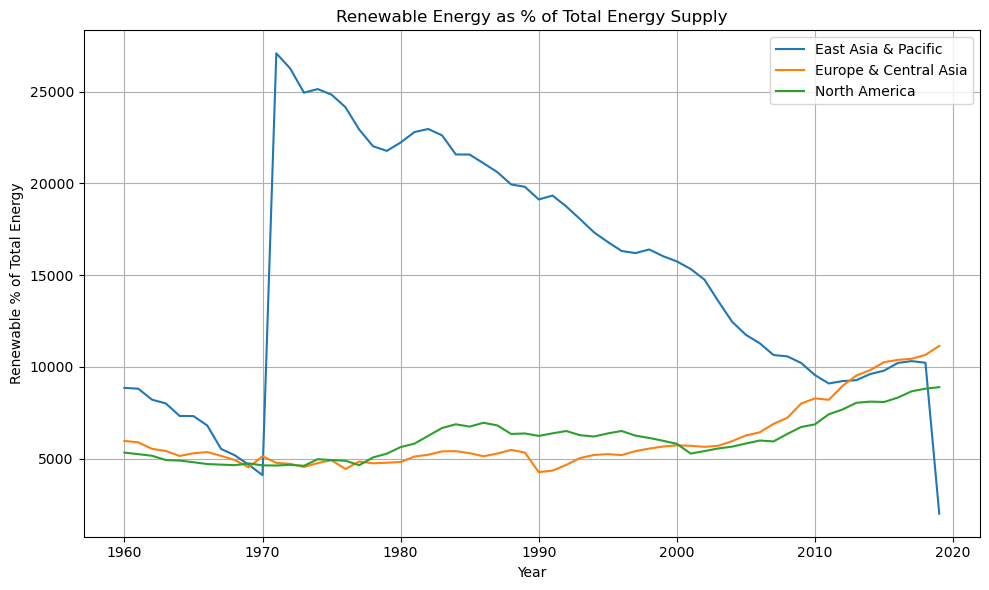

In [1]:
#####PART 1 ; Renewable energy per region########



import pandas as pd
import matplotlib.pyplot as plt


renewable = pd.read_csv('DP_Live_energy_Renewable.csv', skiprows=4)
primary = pd.read_csv('DP_Live_energy_PrimaryEnergySupply.csv', skiprows=4)

print(renewable.columns)
print(primary.columns)

# here i renamed some of the columns to make it more understandable for myself
renewable.rename(columns={
    'LOCATION': 'Country',
    'TIME': 'Year',
    'Value': 'Renewable_KTOE'
}, inplace=True)

primary.rename(columns={
    'LOCATION': 'Country',
    'TIME': 'Year',
    'Value': 'Total_KTOE'
}, inplace=True)

regions = ['East Asia & Pacific', 'Europe & Central Asia', 'North America']
#filtering the data so i only get the sets of data that correspond to the regions i have chosen 
renewable_filtered = renewable[renewable['Region'].isin(regions)]
primary_filtered = primary[primary['Region'].isin(regions)]

#combined the two sets of data from the renewable table and the primary table to get the total amount of renewable
# energy as a percentage of total energy
merged = pd.merge(renewable_filtered, primary_filtered,
                  on=['Country', 'Year', 'Region'], suffixes=('_renewable', '_total'))

merged['Renewable_Percent'] = (merged['Renewable_KTOE'] / merged['Total_KTOE']) * 100




# group by region and year then sum values
renewable_trend = renewable_filtered.groupby(['Region', 'Year'])['Renewable_KTOE'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
for region in regions:
    region_data = renewable_trend[renewable_trend['Region'] == region]
    plt.plot(region_data['Year'], region_data['Renewable_KTOE'], label=region)

plt.title('Renewable Energy Generation Over Time (KTOE)')
plt.xlabel('Year')
plt.ylabel('Renewable Energy (KTOE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()





# Group merged data by region and year then summing renewable and total
trend_pct = merged.groupby(['Region', 'Year'])[['Renewable_KTOE', 'Total_KTOE']].sum().reset_index()
trend_pct['Renewable_Percent'] = (trend_pct['Renewable_KTOE'] / trend_pct['Total_KTOE']) * 100

# Plot
plt.figure(figsize=(10, 6))
for region in regions:
    region_data = trend_pct[trend_pct['Region'] == region]
    plt.plot(region_data['Year'], region_data['Renewable_Percent'], label=region)

plt.title('Renewable Energy as % of Total Energy Supply')
plt.xlabel('Year')
plt.ylabel('Renewable % of Total Energy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


####HYPOTHESIS####
#'I think that all my selected regions will have shown a increase in renewable energy production over time and that 
# europe and central asia would've had the fastest rise compared to the other two regions mainly due to technology 
# innovations'



####HYPOTHESIS####
# 'I believe the percentage contribution of renewables for all regions will have increase over time due to well 
# known international policy agreements e.g. the kyoto agreement'

['Country Code', 'Country Name', 'Year', 'Population', 'GDP', 'Coal (% of total)', 'Oil (% of total)', 'Natural Gas (% of total)', 'Nuclear (% of total)', 'Hydroelectric (% of total)', 'Renewable excluding hydroelectric (% of total)', 'Renewable excluding hydroelectric (kWh)']


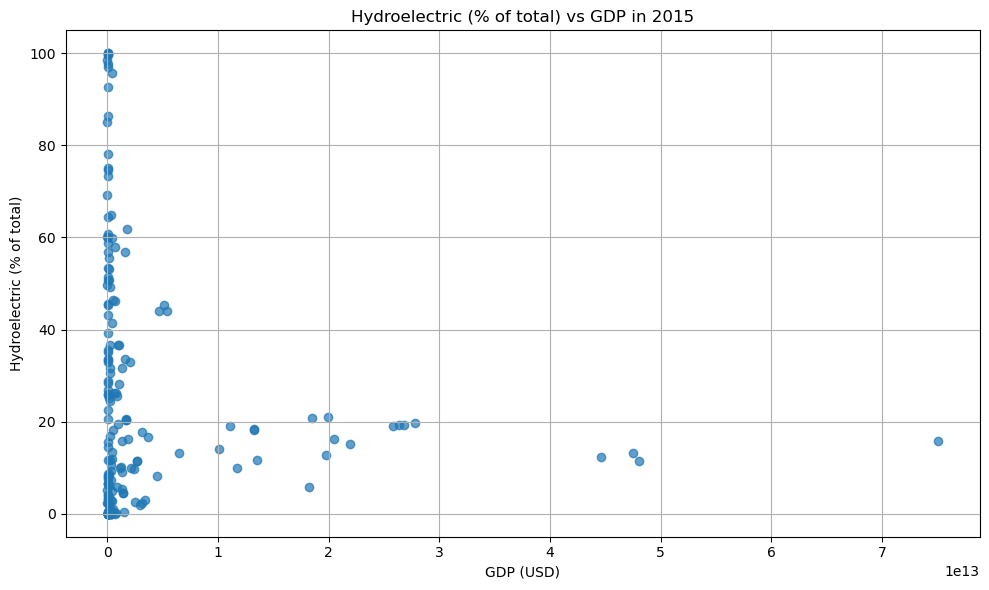

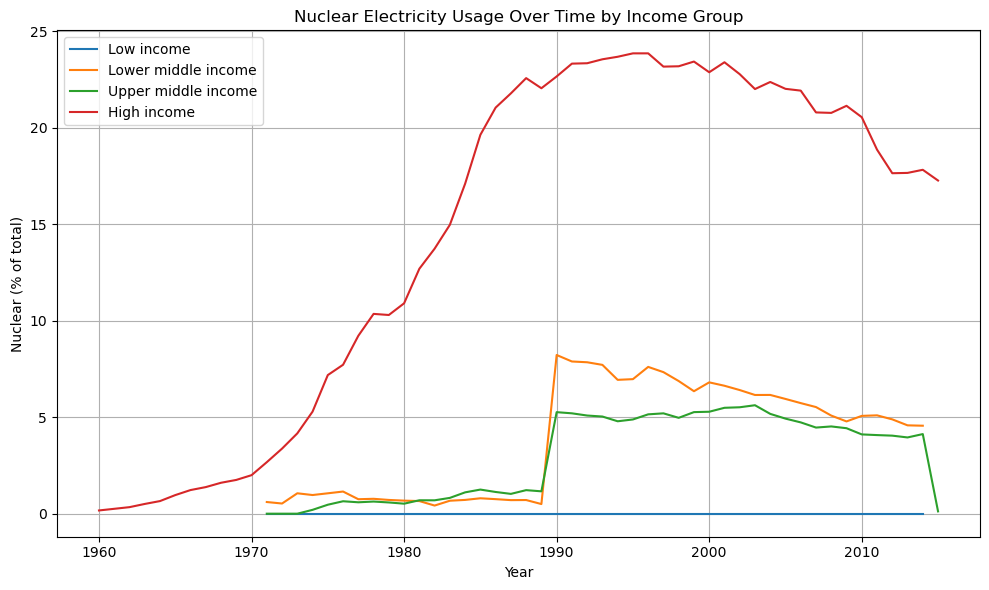

In [3]:
#####Part 2; Electricity sector contributions####
# Load the demographic/electricity data
df = pd.read_csv("API_SP.COMBINED.TOTL_DS2_en_csv_v2.csv")
print(df.columns.tolist())


#Relationship between GDP and Nuclear energy 

# Select year 2015 and drop NaNs for GDP and selected sector
year = 2015
sector = "Hydroelectric (% of total)"

gdp_sector_2015 = df[(df['Year'] == year)][['Country Name', 'GDP', sector]].dropna()

# Scatter plot GDP vs Nuclear (% of total)
plt.figure(figsize=(10, 6))
plt.scatter(gdp_sector_2015['GDP'], gdp_sector_2015[sector], alpha=0.7)
plt.title(f"{sector} vs GDP in {year}")
plt.xlabel("GDP (USD)")
plt.ylabel(f"{sector}")
plt.grid(True)
plt.tight_layout()
plt.show()



# Filter for income groups
income_groups = ['Low income', 'Lower middle income', 'Upper middle income', 'High income']
df_income = df[df['Country Name'].isin(income_groups)]

# Group by year and income grou  then average of sector percentage
sector_trend = df_income.groupby(['Country Name', 'Year'])['Nuclear (% of total)'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
for group in income_groups:
    group_data = sector_trend[sector_trend['Country Name'] == group]
    plt.plot(group_data['Year'], group_data['Nuclear (% of total)'], label=group)

plt.title('Nuclear Electricity Usage Over Time by Income Group')
plt.xlabel('Year')
plt.ylabel('Nuclear (% of total)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Hypothesis 1###
#Countries with higher GDP in 2015 will have a higher share of hydroelectric power in their electricity mix


###Hypothesis 2###
#High-income countries will consistently use more nuclear energy than lower-income groups over time